In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff



# Steps:
#     1. Import data 
#     2. Clean data 
#     3. Hypothesis 
#     4. Analyze & Visualize
#     5. Conclusions 

In [88]:
#Step 1: Import/show data
heart_data = pd.read_csv('heart.csv.xls')
heart_data.head()

#heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#Step 2: Clean data 

heart_data.info()

# There are no null values
# All data are numbers (int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
#Check for duplicate rows 

duplicates = heart_data[heart_data.duplicated()]
if not duplicates.empty:
    print("Found duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found")

# Remove any duplicates = Removed 1 row
heart_no_duplicates = heart_data.drop_duplicates(keep='first')


Found duplicate rows:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [25]:
# Step 3: HYPOTHESIS

# Hypothesis: A significant predictor of heart attack risk is age. Specifically, an older individual is more likely to experience a heart attack compared to 
# younger individuals.

# To test this hypothesis, we will draw statistical analysis on the dataset to determine whether there are any significant relationship between age and heart
# attack risk. This may also determine whether there is a relationship between other potential predictors of heart attack risks such as cholesterol levels, gender,
# and resting blood pressure. By testing the hypothesis, the researcher can gain insights into the factors that contribute to heart attack risk and inform potential 
# interventions or treatments. 

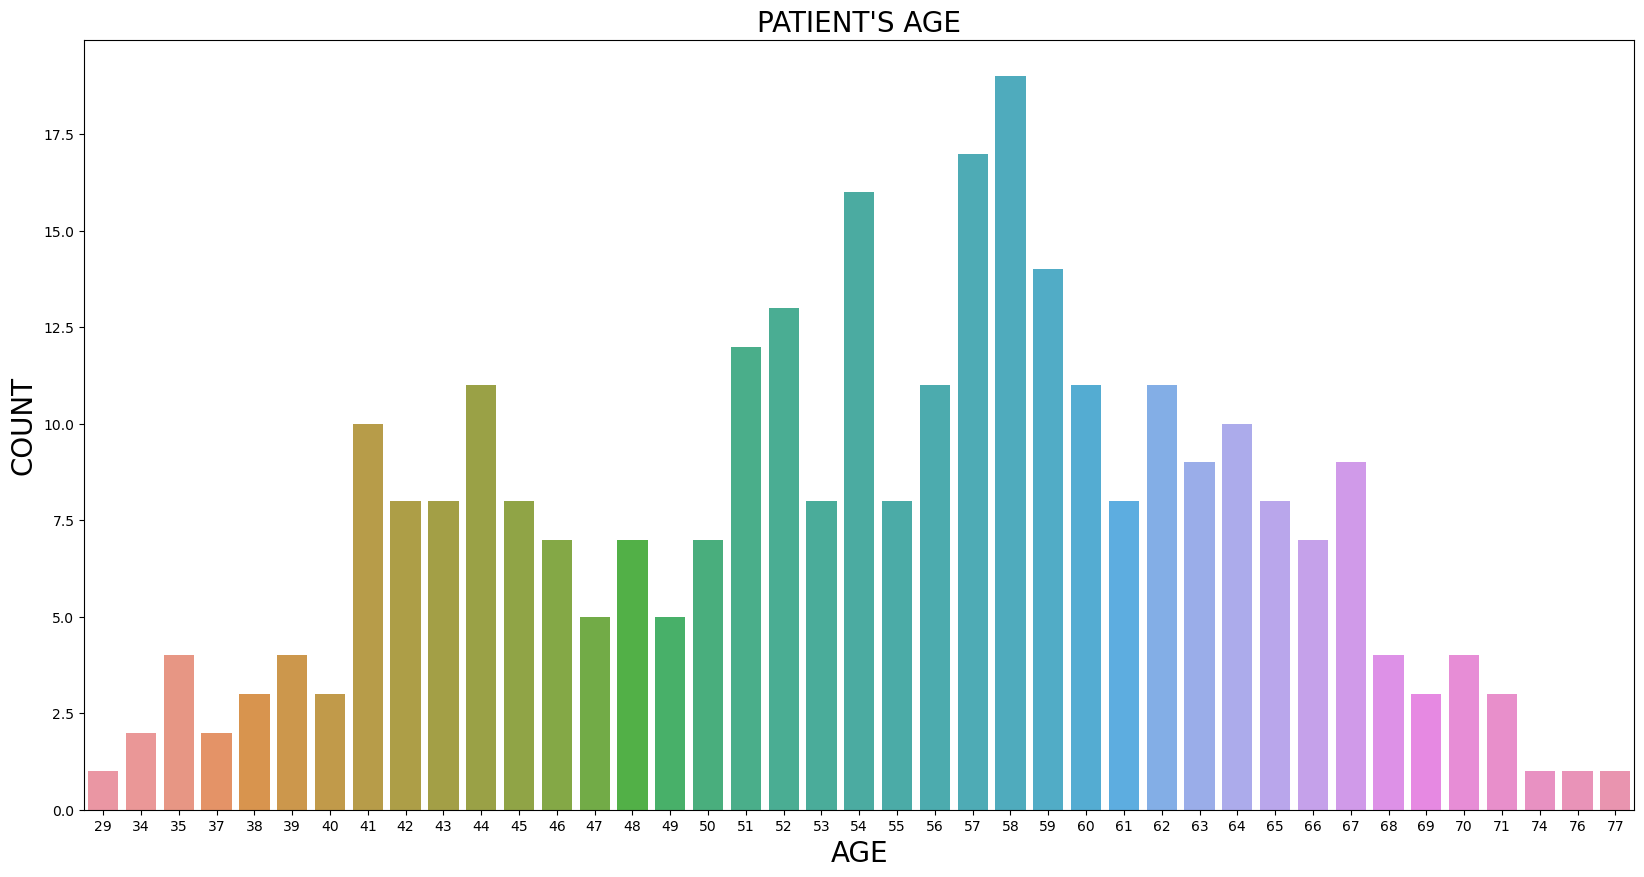

In [26]:
#Step 3: ANALYZE & VISUALIZE - Age, cholesterol, gender, underlying conditions, 
plt.figure(figsize=(20,10))
sns.countplot(x=heart_data["age"])
plt.title("PATIENT'S AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

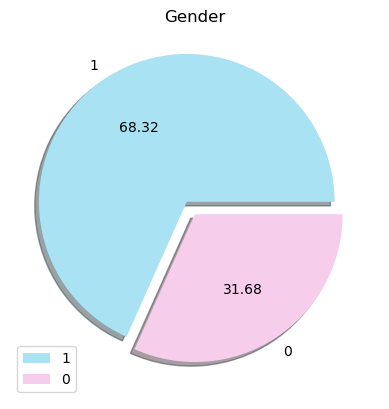

In [113]:
# Dataset shows that males had a higher risk of heart attack

myexplode=[.1,0]
label=['Male','Female']
plt.pie(heart_data['sex'].value_counts(),autopct='%.2f',labels=heart_data['sex'].value_counts().index,colors=['#A9E2F3','#F6CEEC'],explode=myexplode,shadow=True)
plt.title('Gender')
plt.legend()
plt.show()

Number of individuals who are female: 96
Number of individuals who are male: 207


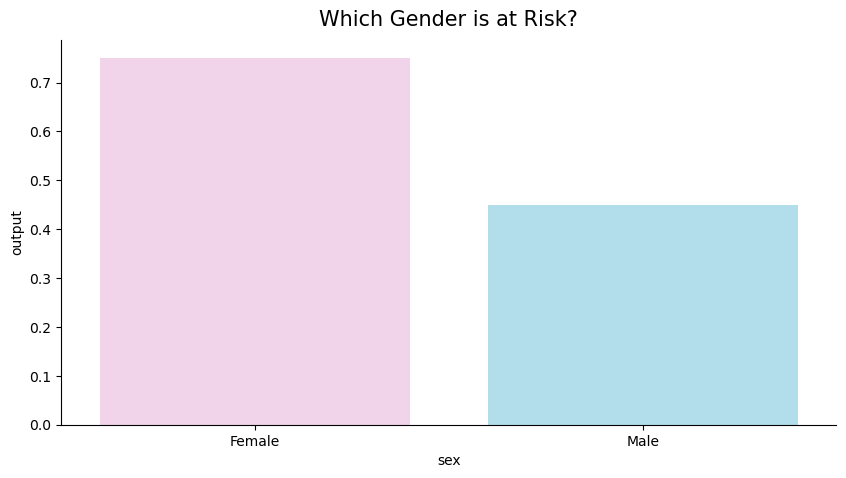

In [112]:
# However, the sex of the studies are not equvilant. Approx. 207 males and 96 females were used for dataset

# Print the number of people by gender
num_male = heart_data['sex'].value_counts()[1]
num_female = heart_data['sex'].value_counts()[0]
print(f"Number of individuals who are female: {num_female}")
print(f"Number of individuals who are male: {num_male}")

# Create a count plot of gender
plt.figure(figsize=[10,5])
sns.barplot(x = heart_data["sex"], y = heart_data["output"], palette=['#F6CEEC','#A9E2F3'], ci=0)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.title("Which Gender is at Risk?", size=15, pad=10)
sns.despine()
plt.show()

/Users/kathleenbasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/kathleenbasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



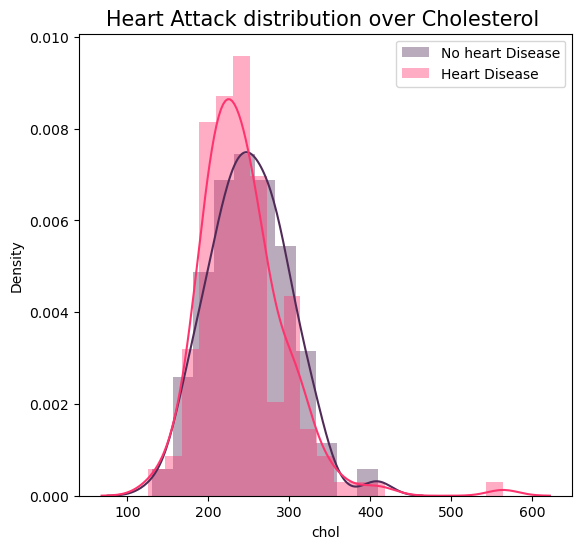

In [49]:
#Heart disease & Cholesterol coorelation
data=heart_data
fig=plt.figure(figsize=(14, 6))
fig = plt.subplot(121)
sns.distplot(data[data['output'] == 0]["chol"], color='#512b58',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["chol"], color='#fe346e',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distribution over Cholesterol ', fontsize=15)
plt.legend()

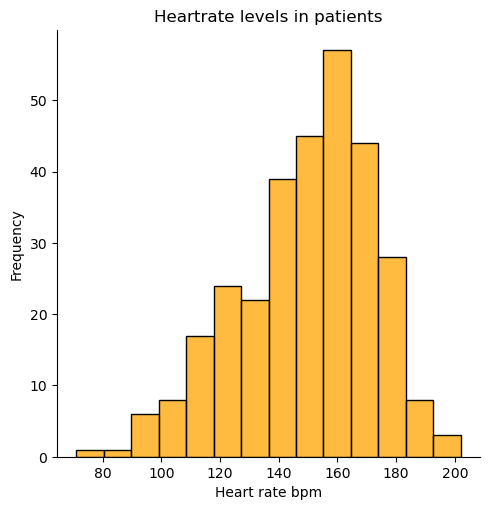

In [33]:
# Patient's resting heart rate

sns.displot(heart_data['thalachh'],color='orange')
plt.xlabel("Heart rate bpm")
plt.ylabel("Frequency")
plt.title("Heartrate levels in patients")
plt.show()

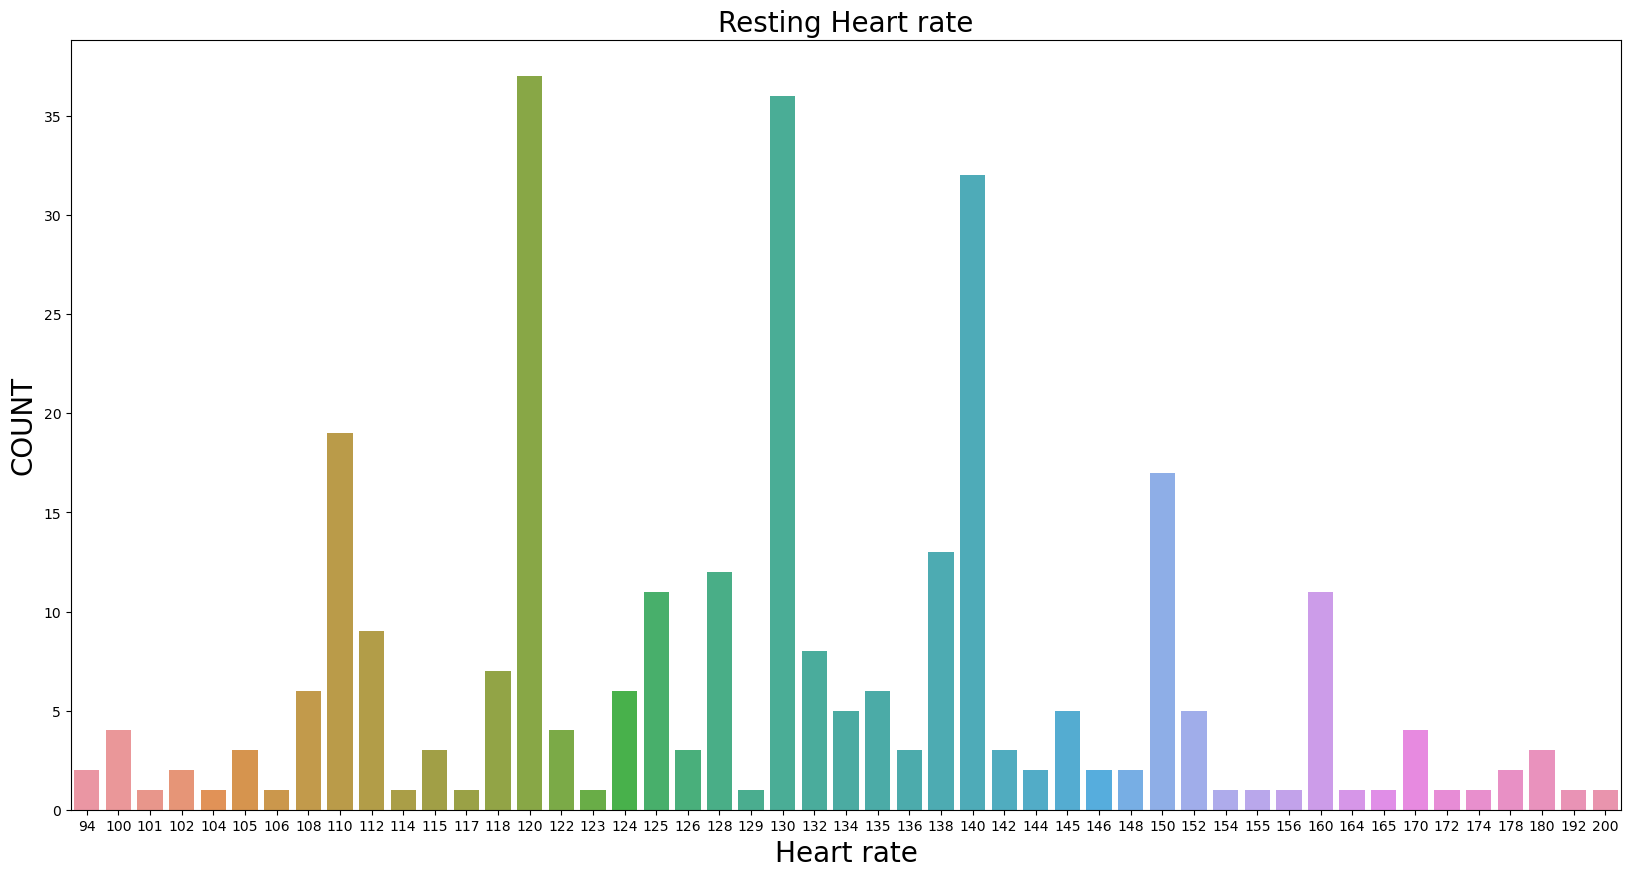

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x=heart_data["trtbps"])
plt.title("Resting Heart rate",fontsize=20)
plt.xlabel("Heart rate",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

/Users/kathleenbasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/kathleenbasco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



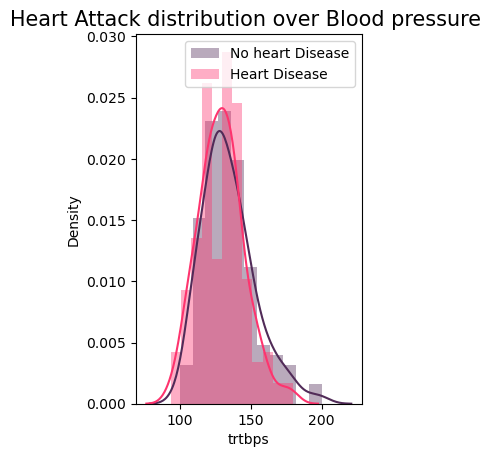

In [89]:
fig = plt.subplot(122)
sns.distplot(data[data['output'] == 0]["trtbps"], color='#512b58',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["trtbps"], color='#fe346e',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distribution over Blood pressure ', fontsize=15)
plt.legend()

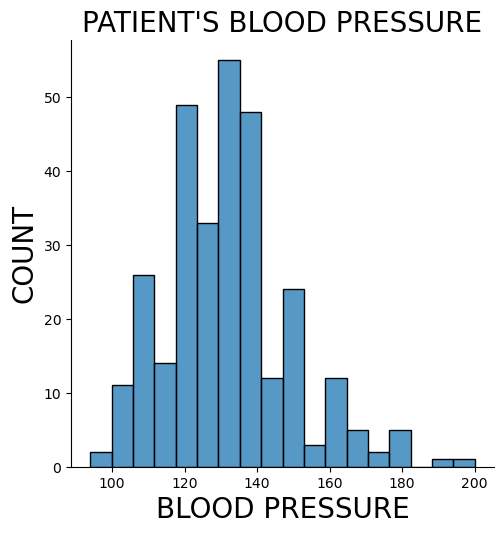

In [35]:
sns.displot(heart_data["trtbps"])
plt.title("PATIENT'S BLOOD PRESSURE",fontsize=20)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

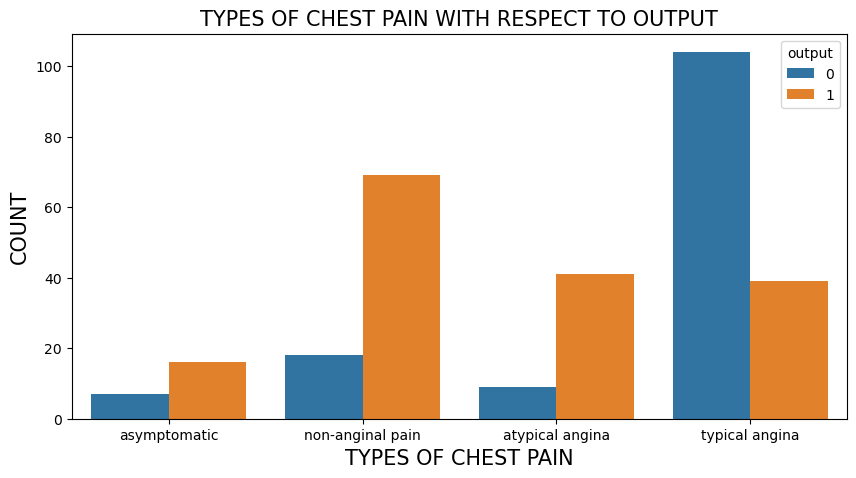

In [44]:
#TYPES OF CHEST PAIN
plt.figure(figsize=(10,5))
chest_pain=heart_data.cp.map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
sns.countplot(x=chest_pain,hue='output',data=heart_data)
plt.xlabel('TYPES OF CHEST PAIN',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('TYPES OF CHEST PAIN WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()

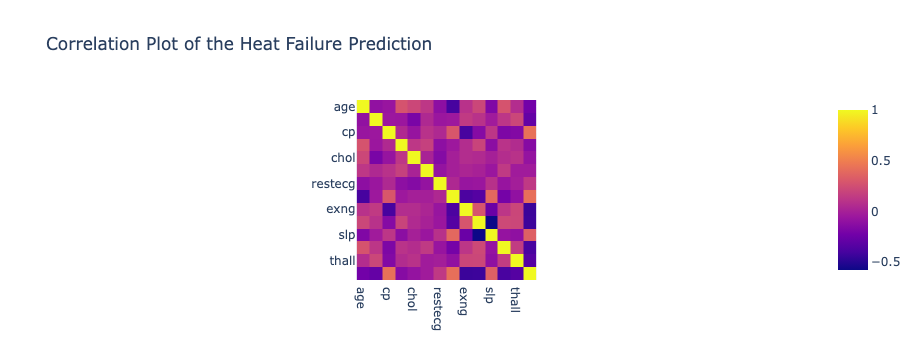

In [36]:
#Correlation plot between ALL variables
px.imshow(heart_data.corr(),title="Correlation Plot of the Heat Failure Prediction")

<AxesSubplot:title={'center':'Prevalence of Heart attack by gender'}, xlabel='sex', ylabel='Count'>

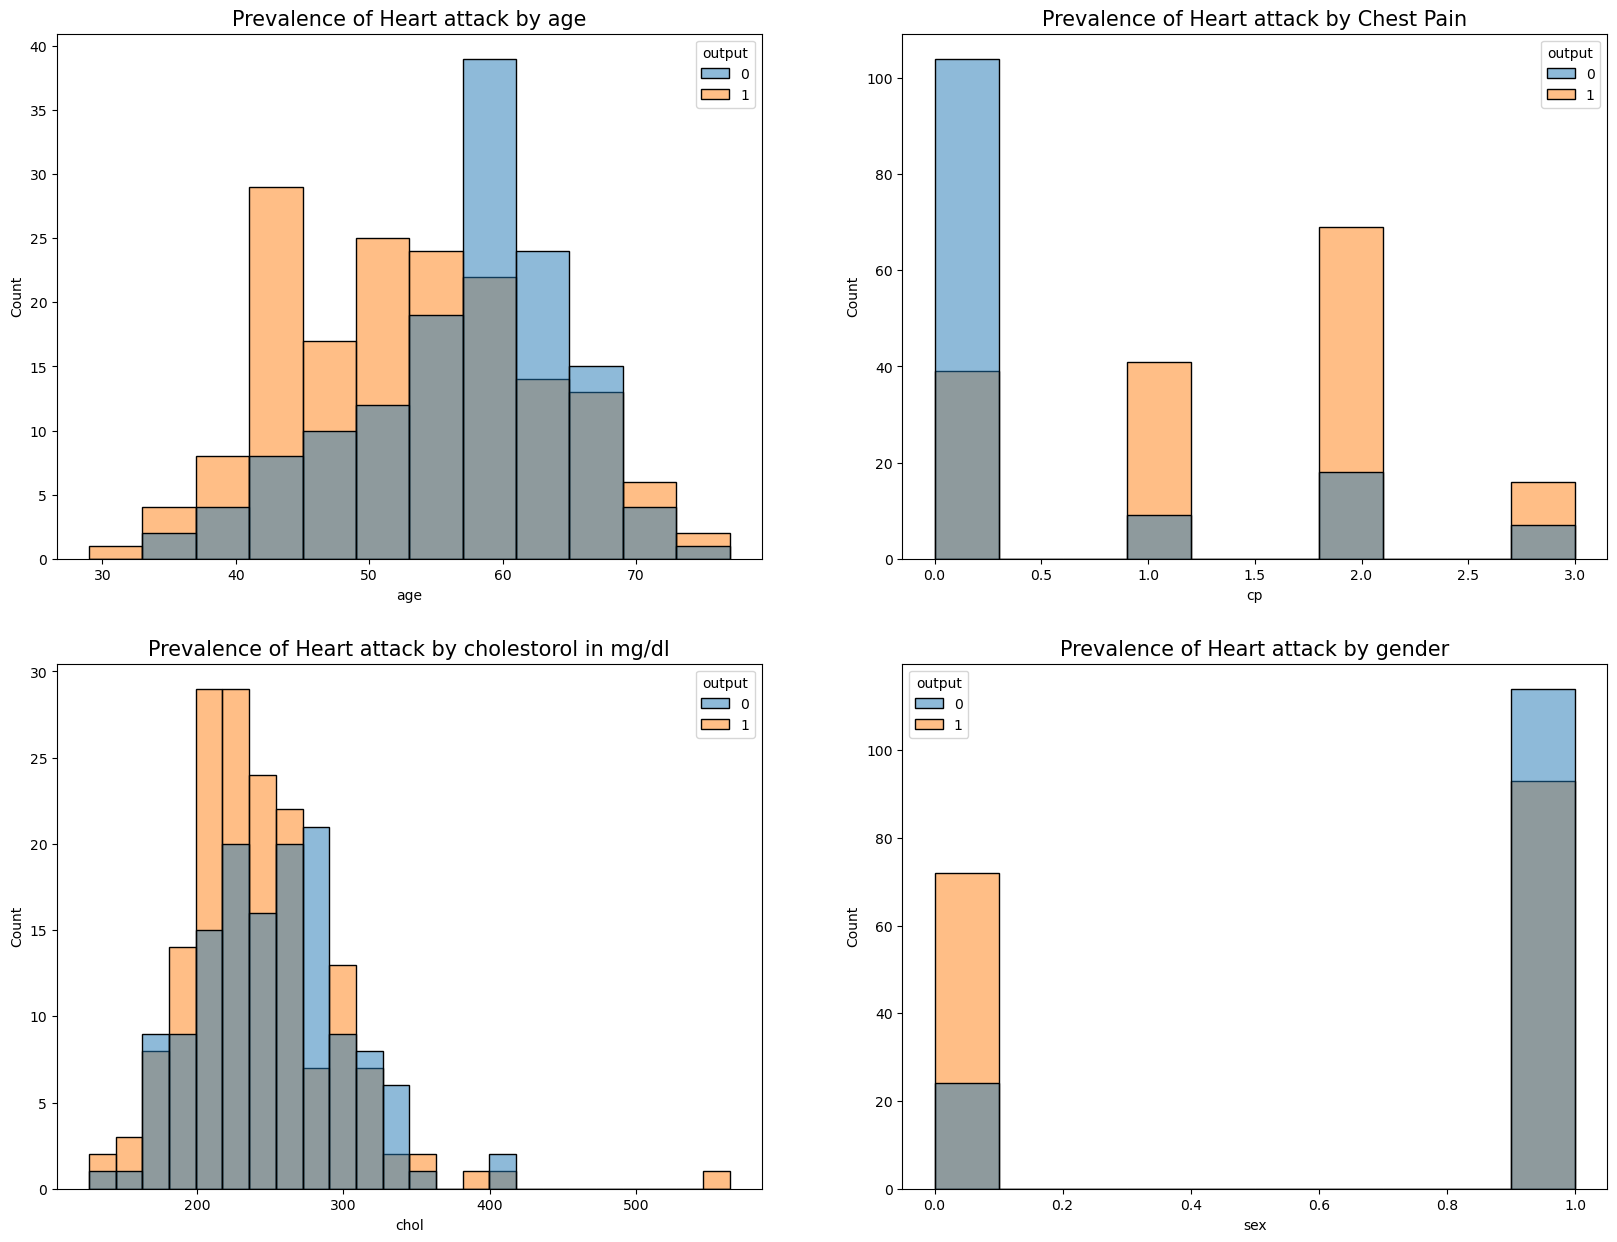

In [83]:
# 0 = more chance of heart attack, 1 = less chance of heart attack
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Prevalence of Heart attack by age',fontsize=15)
sns.histplot(x = heart_data['age'], hue = heart_data['output'])

plt.subplot(2,2,2)
plt.title('Prevalence of Heart attack by Chest Pain',fontsize=15)
sns.histplot(x = heart_data['cp'], hue = heart_data['output'])

plt.subplot(2,2,3)
plt.title('Prevalence of Heart attack by cholestorol in mg/dl',fontsize=15)
sns.histplot(x = heart_data['chol'], hue = heart_data['output'])

plt.subplot(2,2,4)
plt.title('Prevalence of Heart attack by gender',fontsize=15)
sns.histplot(x = heart_data['sex'],hue = heart_data['output'])

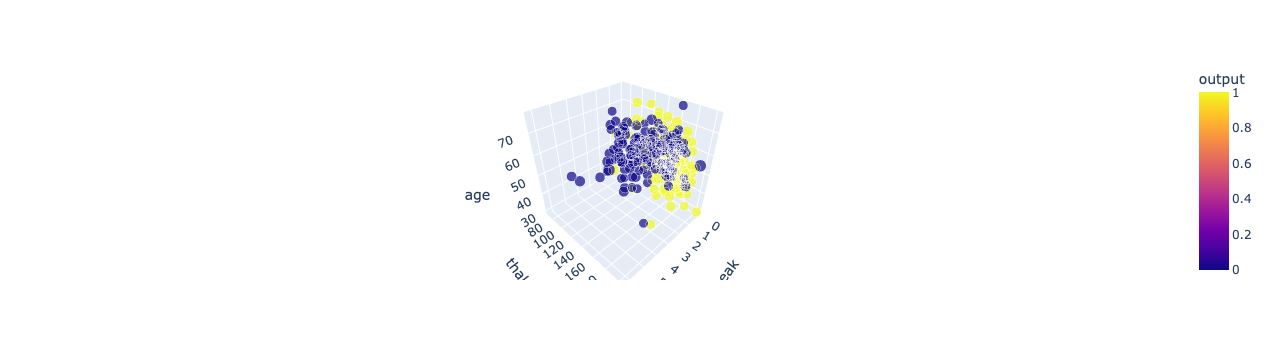

In [62]:
#Correlation of heart attacks between age, cholesterol, and blood pressure. 

fig = px.scatter_3d(heart_data, x='oldpeak', y='thalachh', z='age',
              color='output',size='trtbps',color_discrete_sequence=['#f64c72','#85bfdc'])
fig.show()